<class 'numpy.ndarray'> (720, 1080, 3)


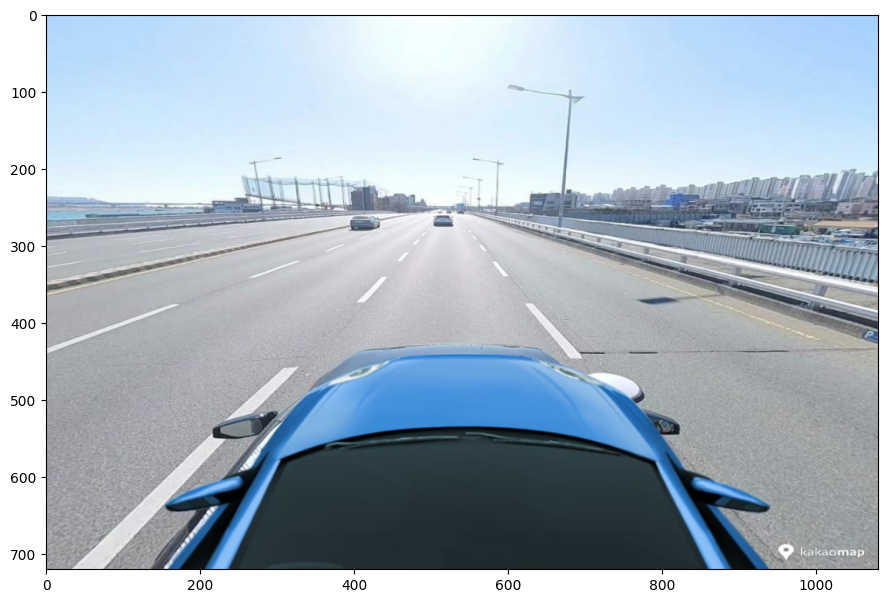

In [75]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

%matplotlib inline

img = mpimg.imread('/content/sample_data/5.jpg')
img = cv2.resize(img,dsize=(1080,720),interpolation=cv2.INTER_AREA)

plt.figure(figsize=(10.8,7.20))
print(type(img),img.shape)
plt.imshow(img)
plt.show()

# 새 섹션

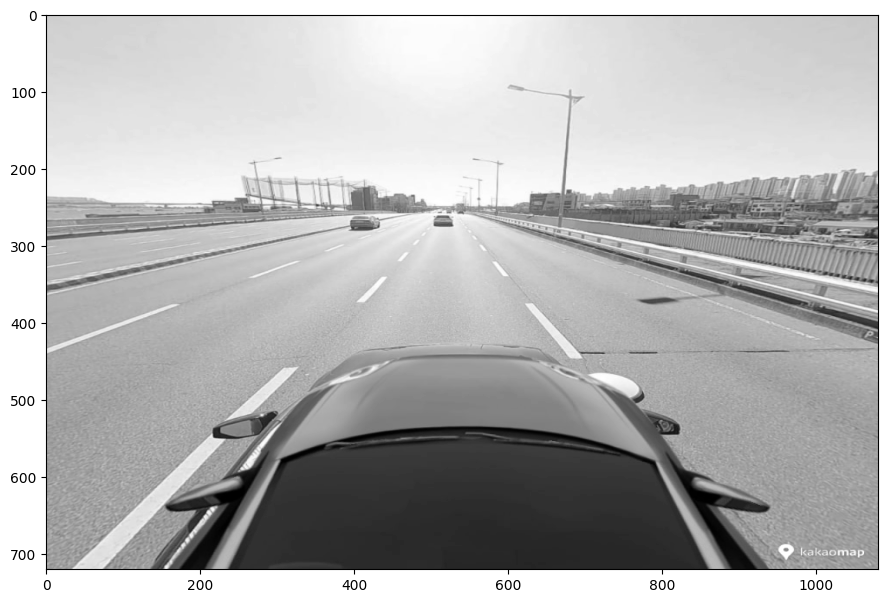

In [76]:
def grayscale(img):
  return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

gray = grayscale(img)
plt.figure(figsize=(10.8,7.20))
plt.imshow(gray,cmap='gray')
plt.show()

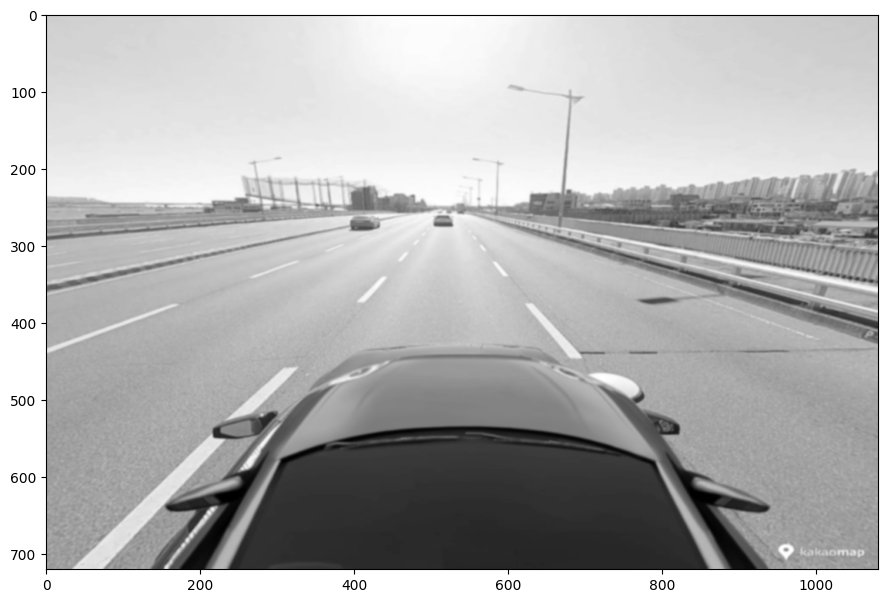

In [77]:
def gaussian_blur(img,kernel_size):
  return cv2.GaussianBlur(img,(kernel_size,kernel_size),0)
kernel_size = 5
blur_gray = gaussian_blur(gray,kernel_size)

plt.figure(figsize=(10.8,7.20))
plt.imshow(blur_gray,cmap='gray')
plt.show()

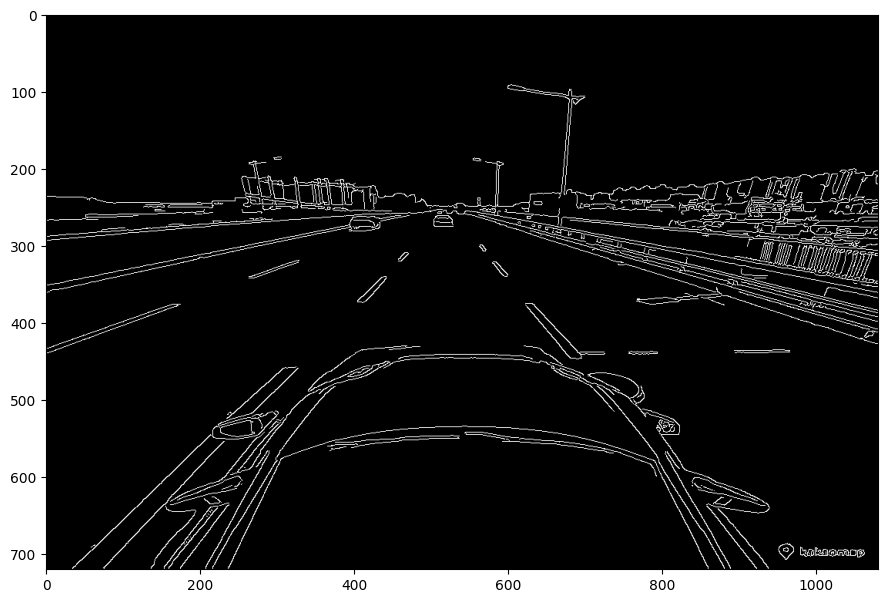

In [78]:
def canny(img,low_threshold,high_threshold):
  return cv2.Canny(img,low_threshold,high_threshold)
low_threshold = 50
high_threshold = 150
edges = canny(blur_gray,low_threshold,high_threshold)

plt.figure(figsize=(10.8,7.20))
plt.imshow(edges,cmap='gray')
plt.show()

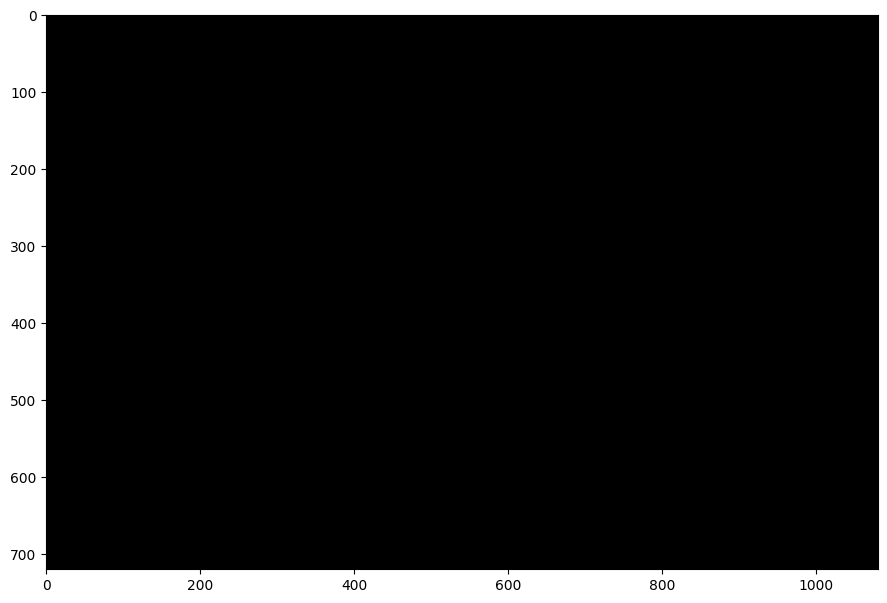

In [79]:
mask = np.zeros_like(img)
plt.figure(figsize=(10.8,7.20))
plt.imshow(mask,cmap='gray')
plt.show()

(720, 1080, 3)
720 1080


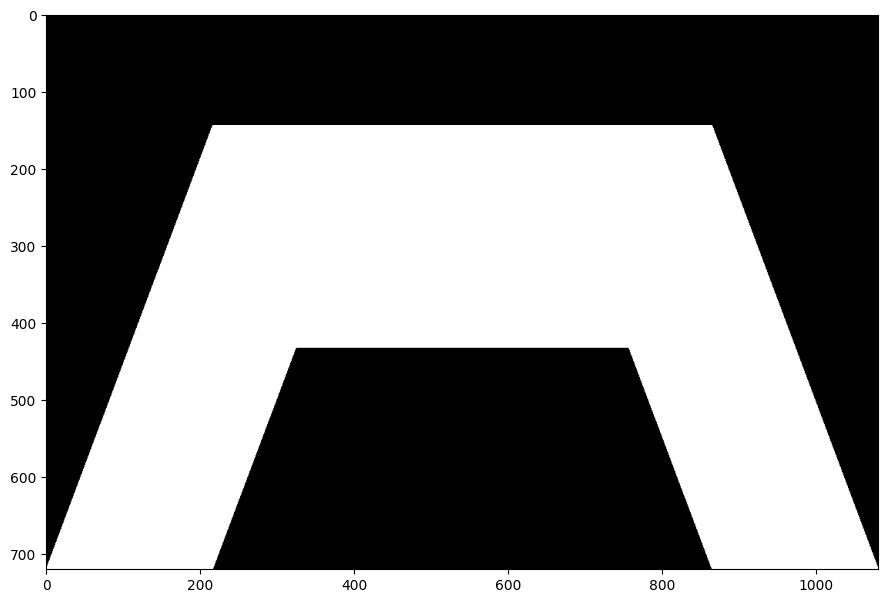

In [80]:
if len(img.shape) > 2:
  channel_count = img.shape[2]
  ignore_mask_color = (255,) * channel_count
else:
  ignore_mask_color = 255

imshape = img.shape
print(imshape)
print(imshape[0],imshape[1])
vertices = np.array([[(imshape[1]*0.2,imshape[0]*0.2),(imshape[1]*0.8,imshape[0]*0.2),
                      (imshape[1],imshape[0]),
                      (imshape[1]*0.8,imshape[0]),(imshape[1]*0.7,imshape[0]*0.6),
                      (imshape[1]*0.3,imshape[0]*0.6),(imshape[1]*0.2,imshape[0]),
                      (0,imshape[0])]],dtype=np.int32)

cv2.fillPoly(mask,vertices,ignore_mask_color)

plt.figure(figsize=(10.8,7.20))
plt.imshow(mask,cmap='gray')
plt.show()

In [81]:
def region_of_interest(img,vertices):
  mask = np.zeros_like(img)
  if len(img.shape) > 2:
    channel_count = img.shape[2]
    ignore_mask_color = (255,)*channel_count
  else:
    ignore_mask_color = 255
  cv2.fillPoly(mask,vertices,ignore_mask_color)

  masked_image = cv2.bitwise_and(img,mask)
  return masked_image

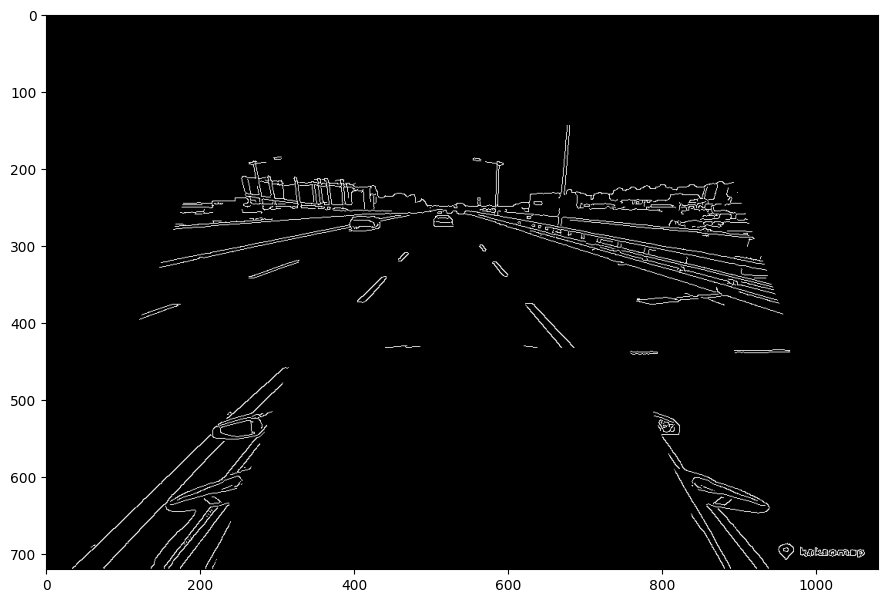

In [82]:
imshape = img.shape
#vertices = np.array([[(imshape[0]*0.2,imshape[1]*0.2),(imshape[0]*0.8,imshape[1]*0.2),(imshape[0],imshape[1]),(0,imshape[1])]],dtype=np.int32)

mask = region_of_interest(edges,vertices)

plt.figure(figsize=(10.8,7.20))
plt.imshow(mask,cmap='gray')
plt.show()

In [89]:
def draw_lines(img,lines,color=[255,0,0],thickness=5):
  for line in lines:
    for x1,y1,x2,y2 in line:
      if abs((y1-y2)/(x1-x2)) > 0.3 and abs((y1-y2)/(x1-x2)) < 10:
        cv2.line(img,(x1,y1),(x2,y2),color,thickness)
def hough_lines(img,rho,theta,threshold,min_line_len,max_line_gap):
  lines = cv2.HoughLinesP(img,rho,theta,threshold,np.array([]),minLineLength=min_line_len,maxLineGap=max_line_gap)
  line_img = np.zeros((img.shape[0],img.shape[1],3),dtype=np.int32)
  draw_lines(line_img,lines)
  return line_img

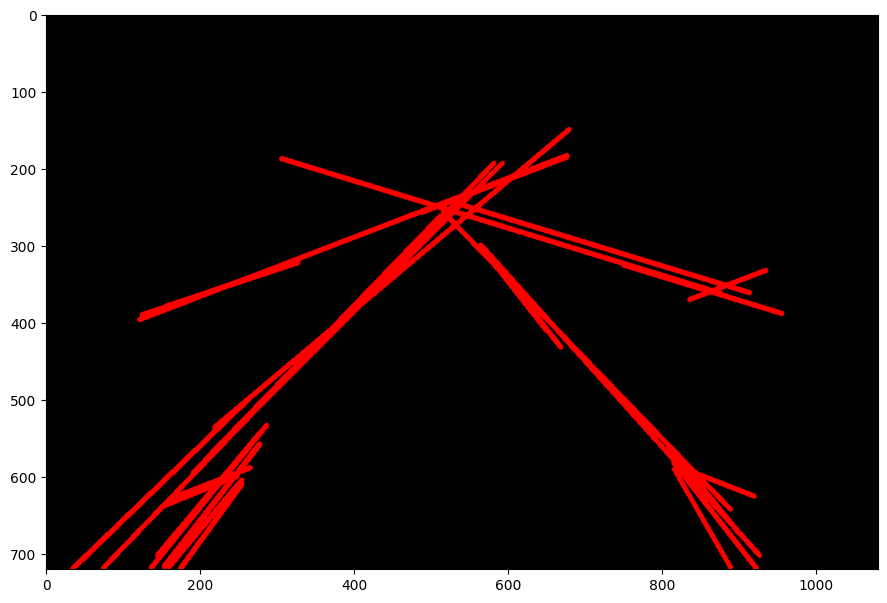

In [92]:
rho = 2
theta = np.pi/180
threshold = 90
min_line_len = 70
max_line_gap = 150
lines = hough_lines(mask,rho,theta,threshold,min_line_len,max_line_gap)

plt.figure(figsize=(10.8,7.20))
plt.imshow(lines,cmap='gray')
plt.show()

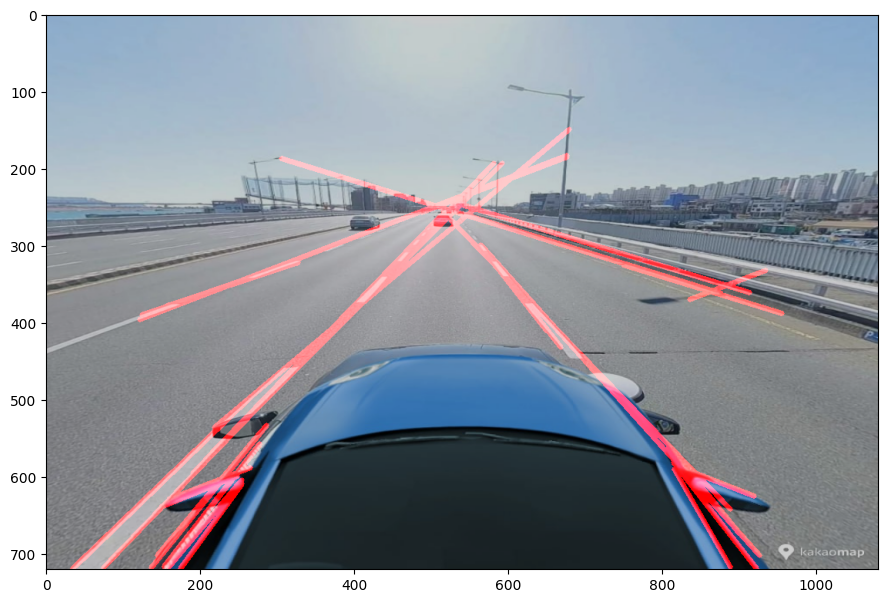

In [93]:
def weighted_img(img,initial_img,alpha=0.8,beta=1.,gamma=0.):
  return cv2.addWeighted(initial_img.astype('uint8'),alpha,img.astype('uint8'),beta,gamma)

lines_edges = weighted_img(lines,img,alpha=0.8,beta=1.,gamma=0.)

plt.figure(figsize=(10.8,7.20))
plt.imshow(lines_edges.astype('uint8'))
plt.show()